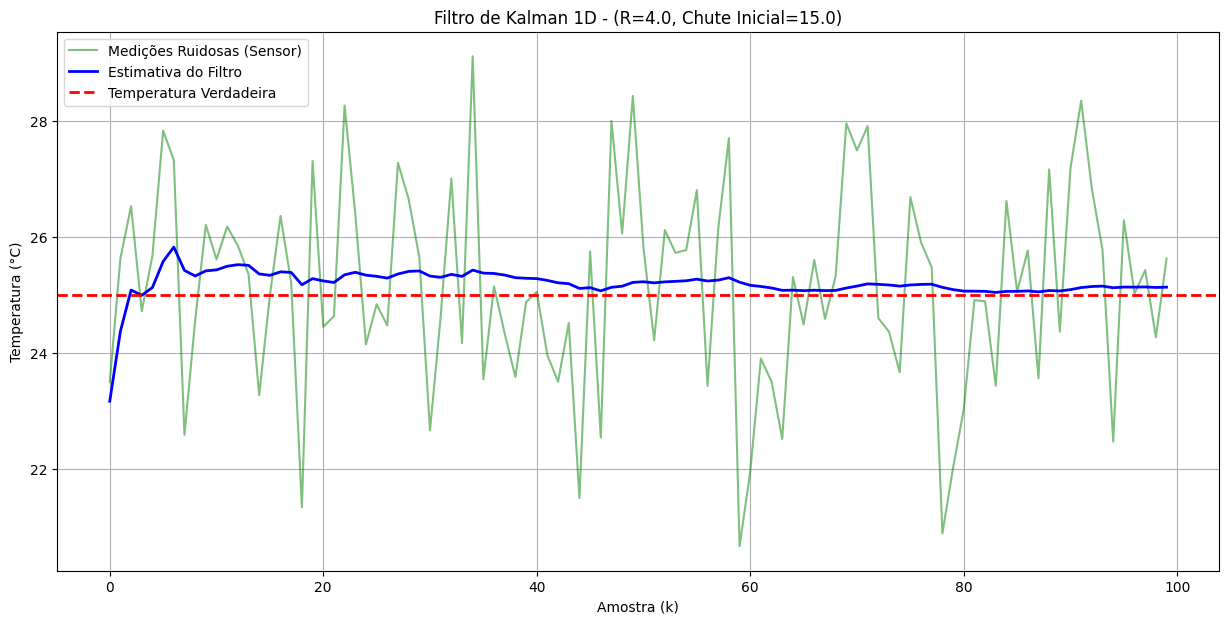

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definições da Simulação ---
TEMP_VERDADEIRA = 25.0
N_PASSOS = 100

# --- 2. Incertezas (Ruído) ---
# Vamos manter o R = 4.0 (sensor ruidoso) do exemplo original
R = 4.0 
desvio_padrao_R = np.sqrt(R) # Desvio padrão é 2.0

# --- 3. Condições Iniciais do Filtro (k=0) ---
x_est = 15.0  # Chute inicial
P_est = 100.0 # Incerteza alta no chute

# --- 4. Geração do Array de Medições ---
# Gere as medições usando a TEMP_VERDADEIRA e o DESVIO_PADRAO_R
hist_medicoes = np.random.normal(TEMP_VERDADEIRA, desvio_padrao_R, N_PASSOS)

# --- 5. Listas para guardar o histórico ---
hist_estimativas = []
hist_ganho_K = []

# --- 6. O Loop do Filtro de Kalman ---
for k in range(N_PASSOS):
    
    # Passo 1: PREDIÇÃO
    x_pred = x_est 
    P_pred = P_est 
    
    # Passo 2: CORREÇÃO
    K = P_pred / (P_pred + R)
    
    # Use a medição k do seu array pré-gerado
    x_est = x_pred + K * (hist_medicoes[k] - x_pred) 
    
    P_est = (1 - K) * P_pred
    
    # Salvar dados
    hist_estimativas.append(x_est)
    hist_ganho_K.append(K)

# --- 7. Plotar os Resultados ---
plt.figure(figsize=(15, 7))
# Corrigido para plotar 'hist_medicoes' como pontos
plt.plot(hist_medicoes, 'g-', markersize=4, alpha=0.5, label='Medições Ruidosas (Sensor)') 
plt.plot(hist_estimativas, 'b-', linewidth=2, label='Estimativa do Filtro')
plt.axhline(y=TEMP_VERDADEIRA, color='r', linestyle='--', linewidth=2, label='Temperatura Verdadeira')
plt.title(f'Filtro de Kalman 1D - (R={R}, Chute Inicial={15.0})')
plt.xlabel('Amostra (k)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

# (O plot do Ganho K pode ser mantido igual ao anterior)